In [1]:
#从TensorFlow的例程 Fashion MNIST：https://github.com/zalandoresearch/fashion-mnist 修改，一步一步修改为检测人行路标的测试

#赖永天 2018-7-17 10分类改成2分类 只区分是不是T恤

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


In [39]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


print (train_labels)
type(train_labels)

#修改分类标签
train_labels_2 = []
for i in range(len(train_labels)):
    if train_labels[i] > 0:
        train_labels_2.append(1)
    else:
        train_labels_2.append(0)
        
#修改分类标签
test_labels_2 = []
for i in range(len(test_labels)):
    if test_labels[i] > 0:
        test_labels_2.append(1)
    else:
        test_labels_2.append(0)

train_labels = np.array(train_labels_2)
test_labels = np.array(test_labels_2)
print(train_labels)
type(train_labels)


[9 0 0 ... 3 0 5]
[1 0 0 ... 1 0 1]


numpy.ndarray

In [40]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names = ['T-shirt/top','Not T-shirt/top']
# 显示一个样本
plt.figure()
plt.imshow(train_images[1])

In [42]:
train_images = train_images / 255.0
test_images = test_images /255.0

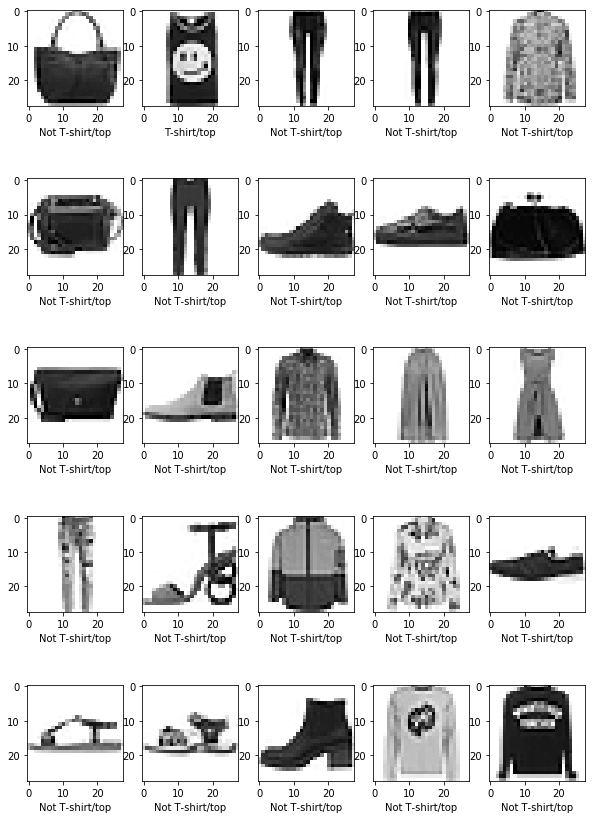

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[100+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[100+i]])


In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])


In [53]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.1105 - acc: 0.9554
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0918 - acc: 0.9612
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0862 - acc: 0.9634
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0814 - acc: 0.9655
Epoch 5/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0775 - acc: 0.9677


In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.9566


In [48]:
predictions = model.predict(test_images)
test_labels[np.argmax(predictions[100])]

1

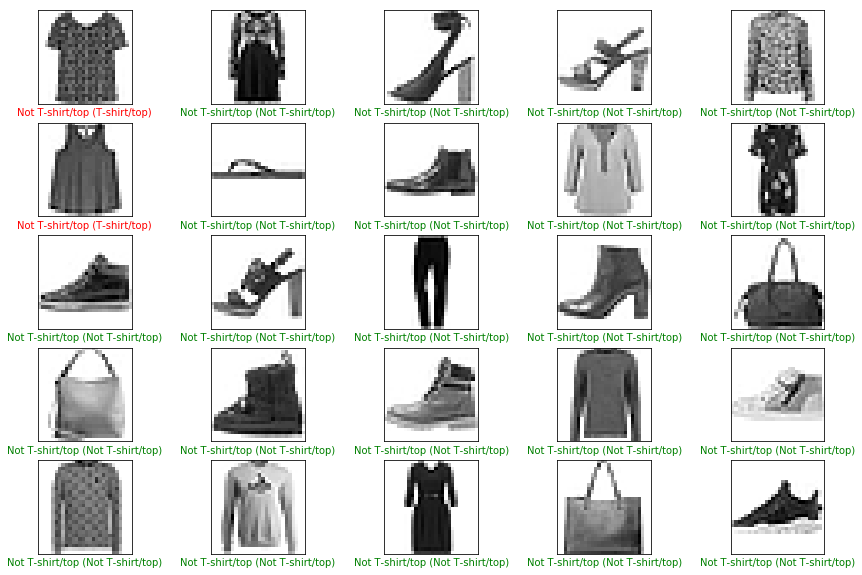

In [64]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
# 修改shift查看后面的结果

plt.figure(figsize=(15,10))

shift = 1000

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i+shift], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i+shift])
    true_label = test_labels[i+shift]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
